# "Pre-lecture" HW [completion prior to next LEC is suggested but not mandatory]
To prepare for this weeks lecture, first watch this video introduction to bootstrapping

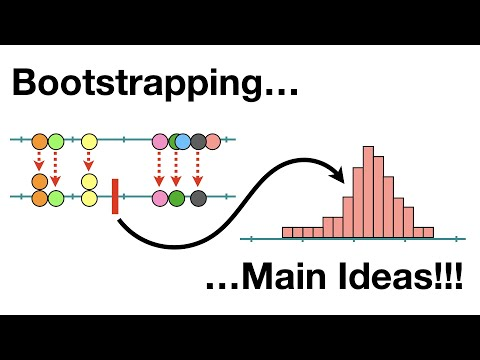

In [33]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

Marking Rubric (which may award partial credit)
[0.1 points]: All relevant ChatBot summaries [including link(s) to chat log histories if you're using ChatGPT] are reported within the notebook
[0.2 points]: Evaluation of correctness and effectiveness of written communication for Question "1"
[0.3 points]: Evaluation of correctness and effectiveness of written communication for Question "6"
[0.4 points]: Evaluation of submission for Question "8"

## 1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

**Session summary with NotebookLM and ChatGPT located in question 4**

The standard deviation is calculated as the square-root of the variance within the original data set. When talking about the "standard deviation" of the original data set, you are directly referring to the spread of the original data. Here, the standard deviation is a metric used to estimate approximately where most of the original data lies. On the other hand, the standard error of the mean is calculated by dividing the standard deviation of the original data by the square root of the size of the original data. This value represents the variability of the sample means and also acts as the estimated standard deviation of the sample means. When finding the standard error of the mean, you are not saying anything directly about the original set of data, but instead are describing the variability of the sample means.


## 2. The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this. How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.

**Session summary with NotebookLM and ChatGPT located in question 4**

To create a 95% confidence interval that would approximately capture 95% of the sample means, we would need to find an interval that approximates 2 standard deviations of the bootstrapped data. This would be equivalent to an interval consisting of plus minus `1.96` times the standard error of the mean. We can find this value by find calculating the mean and standard deviation of the original data, then calculate the standard error of the mean by dividing the standard deviation by the square-root of the sample size, and finally mark the interval `1.96` times the standard error of the mean below and above the mean.

## 3. Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.

**Session summary with NotebookLM and ChatGPT located in question 4**

Instead of using the standard deviation to calculate a confidence interval, we can use the `.quantile()` method from numpy to calculate the bottom `2.5` percent and top `97.5` percent of the bootstrapped data. Then, any data that lies between those two points will be within the `95` percent confidence interval. This approach works even when the bootstrapped data does not closely follow a normal distribution, such as a multi-modal or skewed distribution.

## 4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).

Session link with ChatGPT: https://chatgpt.com/share/66f9e917-13fc-8012-ade7-59835d582b6e

In [34]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Set the size and range of the original sample
sample_size = 100
value_range = [0, 100]

# Generate the original data using parameters above
original_sample = np.random.choice(value_range[1], sample_size) - value_range[0]

# Set the number of bootstrapping repetitions
bootstrap_amount = 10000
bootstrapped_data = np.array([])
for _ in range(bootstrap_amount):
    # Create a bootstrapped population sampling from the orignal data with replacement
    bootstrapped_sample = np.random.choice(original_sample, sample_size)
    bootstrapped_data = np.append(bootstrapped_data, bootstrapped_sample.mean()) # Here you can change the value you are attempting to calculate
    # Example: bootstrapped_data = np.append(bootstrapped_data, bootstrapped_sample.median())

fig = make_subplots(rows=1, cols=2, subplot_titles=("Original Data distribution", "Bootstrapped mean distribution"))

fig.add_trace(go.Histogram(x=original_sample), row=1, col=1)
fig.add_trace(go.Histogram(x=bootstrapped_data), row=1, col=2)

# Add vertical lines indicating the mean of each set of data
fig.add_vline(original_sample.mean(), line_dash="dot", line_color="green", row=1, col=1)
fig.add_vline(bootstrapped_data.mean(), line_dash="dot", line_color="green", row=1, col=2)

# Use np.quantile to find the inner 95% of the bootstrapped means and add solid green vertical lines to both graphs
# On the bootstrapped distribution graph, these lines indicate where 2.5% and 97.5% of the data lie before
# On the original distribution, these lines indicate the 95% confidence interval for the mean
fig.add_vline(np.quantile(bootstrapped_data, 0.025), line_dash="solid", line_color="green")
fig.add_vline(np.quantile(bootstrapped_data, 0.975), line_dash="solid", line_color="green")

# Using the SEM to estimate the 95% confidence interval instead of using np.quantile
sem = original_sample.std() / (sample_size ** 0.5)
fig.add_vline(original_sample.mean() + 1.96 * sem, line_dash="dot", line_color="yellow")
fig.add_vline(original_sample.mean() - 1.96 * sem, line_dash="dot", line_color="yellow")

fig.update_layout(showlegend=False)

fig.update_xaxes(range=value_range)
fig.show()

### NotebookLM Q1-Q4 Interaction Summary
##### Summary of Standard Deviation, Standard Error and Confidence Intervals

Today, we discussed the differences between the standard deviation of a dataset, the standard error of the mean, and how to create confidence intervals using bootstrapping.

*   The **standard deviation of the original data** shows how spread out individual data points are from the sample mean (x̄). A larger standard deviation means the data points are more spread out, while a smaller standard deviation indicates that they are more clustered around the sample mean. 
*   The **standard error of the mean** reveals the variability you can expect in the sample mean itself if you were to take multiple samples from the same population. It effectively measures the reliability of the sample mean as an estimate of the true population mean.  As the sample size increases, the standard error of the mean decreases.

In the context of bootstrapping, the standard deviation of the original data is calculated from the initial sample. The standard error of the mean is often approximated by calculating the standard deviation of the bootstrapped sample means.

To create a 95% confidence interval using the standard error of the mean, you would first calculate the mean of the bootstrapped means. Then, you would calculate the standard deviation of the bootstrapped means, which estimates the standard error of the mean. Finally, you would mark the interval two standard deviations below and above the mean. This works because of the Central Limit Theorem, which states that the distribution of sample means tends to be approximately normal. As a result, roughly 95% of the data will fall within two standard deviations of the mean, as described by the Empirical Rule. 

Alternatively, you can create a 95% bootstrapped confidence interval by calculating the 2.5th and 97.5th percentiles of the bootstrapped means using the `.quantile()` method from NumPy. This method does not depend on the assumption of normality and directly utilizes the results from the bootstrapping simulations.


### ChatGPT Summary of the Interaction:

The conversation revolved around the student’s understanding of **bootstrapping** and how to use it to create **confidence intervals**, particularly focusing on the **95% confidence interval**. The student initially provided responses to questions related to key concepts like **standard error of the mean (SEM)**, **standard deviation (SD)**, and how bootstrapping can be applied to calculate confidence intervals without assuming normality.

### Key Concepts Covered:

1. **Standard Error of the Mean (SEM) vs. Standard Deviation (SD):**
   - The student explained the difference between the **SEM** (which measures the variability of the sample means) and the **SD** (which measures the spread of the original data). The SEM is calculated as the SD divided by the square root of the sample size.

2. **Using SEM to Create a Confidence Interval:**
   - The student learned how to construct a **95% confidence interval** using **1.96 times the SEM**, which approximates the range that would capture 95% of the sample means under the assumption of normality.

3. **Creating Confidence Intervals Using Bootstrapping:**
   - The student explained how to use the **2.5th and 97.5th percentiles** of bootstrapped data to create a **95% confidence interval** without relying on the SEM. This method works well when the bootstrapped data doesn’t follow a normal distribution, such as in skewed or multi-modal distributions.

4. **Bootstrapping for Other Statistics:**
   - The conversation included a Python code demonstration for creating a **95% confidence interval** for the population mean based on bootstrapping. The code could be adapted to calculate confidence intervals for other statistics, like the **median**, by altering the bootstrapped values.

### Clarifications and Insights:

Throughout the interaction, the student showed a solid understanding of the process but needed some clarifications on specific points:
- The distinction between using **SEM** for a confidence interval and directly using **bootstrapped percentiles**.
- The relationship between the **original data’s SD** and the **distribution of bootstrapped sample means**.

Overall, the student developed a clear conceptual and practical grasp of **bootstrapping** and its applications in estimating confidence intervals.

##### 5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the population parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.

The population parameter is referring to the true value of the population, which is unknown to us statisticians. We create confidence intervals using sample statistics derived from samples of the population in which the population parameter may or may not lie within. The key difference between the sample statistic and the population parameter is that one is derived from samples of the population, acting as an estimate, whereas the other is a defined value which is unknown but may lie within some interval we define with some amount of confidence.


##### 6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.

Session link for Q6: https://chatgpt.com/share/66febce5-82fc-8012-aaa9-cdf55cee6016

1) What is the process of bootstrapping?  
Bootstrapping is the process of repeatedly taking independent and identically distributed samples of the same size from an initial sample of a population, tracking their statistical data to create a visual distribution. 

2) What is the main purpose of bootstrapping?  
Bootstrapping allows us to determine with a level of certainty, where specific parameter (population statistic) of a population lies. We use bootstrapping to create a confidence interval, using the inner range of the collected statistical data, in which the true population parameter may or may not lie in. Typically, we create a confidence interval using the inner 95% of our statistical data to say with 95% confidence that the population parameter of our population lies within the interval.

3) If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?  
You could use bootstrapping to create a 95% confidence interval using the data collected from the sample means and check whether the confidence interval covers the hypothesized guess about the population parameter. If the guess lies outside of the interval, than you must reject the hypothesis with 95% confidence, otherwise you can decline to reject the hypothesis with 95% confidence.

##### 7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.

Session link for Q7: https://chatgpt.com/share/66fec6f8-8c2c-8012-90da-f884d58088cb

To reject the null hypothesis means that the data collected significantly differs from having no effect or zero change; in our case with our 95% confidence interval, if zero falls outside of the interval. Even though our observed sample mean is not zero, there is still the possibility that the the null hypothesis lies near our observed mean; in our case, within our confidence interval. Only if it is far enough away from from the sample means, then can we reject the null hypothesis.

##### 8. Complete the following assignment.
Vaccine Data Analysis Assignment
Overview

The company AliTech has created a new vaccine that aims to improve the health of the people who take it. Your job is to use what you have learned in the course to give evidence for whether or not the vaccine is effective.

Data AliTech has released the following data.

Deliverables While you can choose how to approach this project, the most obvious path would be to use bootstrapping, follow the analysis presented in the "Pre-lecture" HW video (above). Nonetheless, we are primarily interested in evaluating your report relative to the following deliverables.

- A visual presentation giving some initial insight into the comparison of interest.
- A quantitative analysis of the data and an explanation of the method and purpose of this method.
- A conclusion regarding a null hypothesis of "no effect" after analyzing the data with your methodology.
- The clarity of your documentation, code, and written report.
Consider organizing your report within the following outline template.
    Problem Introduction
        An explaination of the meaning of a Null Hypothesis of "no effect" in this context
        Data Visualization (motivating and illustrating the comparison of interest)
    Quantitative Analysis
        Methodology Code and Explanations
        Supporting Visualizations
    Findings and Discussion
        Conclusion regarding a Null Hypothesis of "no effect"
        Further Considerations

Further Instructions

When using random functions, you should make your analysis reproducible by using the np.random.seed() function
Create a CSV file and read that file in with your code, but do not include the CSV file along with your submission

Q8 Clarifications
What you should explain, though, in Q8, is the PURPOSE and motivation of everything (not the mechanism / process).
    1. barplots of the original data makes sense (or histograms or KDEs)
    2. histograms of the bootstrap sampling distribution, with an annotation for where the hypothesized mean is relative to that.
    3. And the explanation of the bootstrapping is to understand the variability/uncertainty of the mean and use this to create a confidence interval providing inference on the population mean (and hence informing the hypothesized mean)


Session link for Q8: https://chatgpt.com/share/66ff41b8-44ac-8012-8d2f-e5e124b43fa9

##### The problem
We want to know if this new vaccine created by AliTech improves the health of the patients that take it. For this to be true, we need to be confident that the drug has some positive effect on the patient that takes it. In other words, we need to be able to reject the null hypothesis, the fact that the vaccine may have no effect.

Lets first plot our sample data and see if we notice any trends.

In [35]:
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.figure_factory as ff

np.random.seed(0)

vaccine_data = pd.read_csv('vaccine_data.csv')
vaccine_data['ChangeInHealthScore'] = vaccine_data['FinalHealthScore'] - vaccine_data['InitialHealthScore']

fig = px.histogram(vaccine_data, x="ChangeInHealthScore", nbins=10)
fig.show()

##### Initial sample observations  
From our histogram, there is not sufficient information to deduce whether our the vaccine has any effect or not. Most of the observations indicate there was some positive effect on the users health score, but some other observations indicate there was no effect or a negative effect on the users health score.

**So what can we do to determine whether we can reject the null hypothesis?**

##### Using bootstrapping 
Since our sample does not provide enough information, lets use the process of bootstrapping over many iterations to generate an interval with 95% confidence to determine whether there is sufficient reason to reject the null hypothesis.

In [36]:
initial_size = vaccine_data.size
number_of_samples = 1000
mean_health_scores = np.array([])

for _ in range(number_of_samples):
    data = np.random.choice(vaccine_data['ChangeInHealthScore'], initial_size)
    mean_health_scores = np.append(mean_health_scores, data.mean())


##### Explanation of code above  
In the code above, we simulate drawing 100,000 independent and identically distributed samples from our initial sample of the population, with identical size to our initial sample. Then we calculate and track mean of each generated sample. From this, we can create a histogram of the statistical sample means and find the interval that covers 95% of the sample means. Assuming our initial sample is unbiased and reflects the general population, we can determine the likelihood of our interval covering the null hypothesis with 95% confidence. 

In [37]:
fig = ff.create_distplot([mean_health_scores], 
                         group_labels=['Mean Health Scores'], 
                         bin_size=0.1,
                         show_rug=False)

lower_bound = np.quantile(mean_health_scores, 0.025)
upper_bound = np.quantile(mean_health_scores, 0.975)

fig.add_vline(lower_bound, line_dash='dot', line_color='green')
fig.add_vline(upper_bound, line_dash='dot', line_color='green')

fig.update_layout(xaxis=dict(range=[-3, 6]))

fig.show()

##### Analysis of distribution of sample means  
The graph above is the distribution of our simulated sample mean. The two dotted green lines indicate the 2.5% and 97.5% upper and lower quantile locations. Using this, we can create an interval capturing 95% of our simulated data with the upper and lower bounds being the 2.5% and 97.5% quantile markings respectively. What do we notice about this range? The null hypothesis is not within the range, therefore we can reject the null hypothesis with 95% confidence as our confidence interval does not include 0 change in health scores.

##### Conclusion  
From bootstrapping, we have determined that we can reject the null hypothesis with 95% confidence. We can also conclude that by taking the vaccine, we can say with 95% confidence that the individual's health score will improve by anywhere between 3.35 and 4.25 points. Thus the vaccine proves to be effective at improving the overall health of the people who take it.